In [90]:
# Load necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [166]:
# Load data from CSV files
pitch_time = pd.read_csv("../Database/pitch_arsenals.csv")
pop_time = pd.read_csv("../Database/poptime.csv")
running_splits = pd.read_csv("../Database/running_splits.csv")

# Pitch Time Data 

In [167]:
# Show Pitch Time
pitch_time.head()

,last_name,first_name,pitcher,ff_avg_speed,si_avg_speed,fc_avg_speed,sl_avg_speed,ch_avg_speed,cu_avg_speed,fs_avg_speed,kn_avg_speed
0,Burnes,Corbin,669203,96.1,96.3,95.0,88.2,90.3,81.6,NaN,NaN
1,Cole,Gerrit,543037,97.8,NaN,92.0,88.7,89.7,83.0,NaN,NaN
2,Alcantara,Sandy,645261,98.0,97.8,NaN,90.0,91.8,86.2,NaN,NaN
3,Mikolas,Miles,571945,93.5,93.0,NaN,87.7,82.7,76.2,NaN,NaN
4,Cease,Dylan,656302,96.8,96.5,NaN,87.4,77.9,81.1,NaN,NaN


In [168]:
pitch_time.describe()

,pitcher,ff_avg_speed,si_avg_speed,fc_avg_speed,sl_avg_speed,ch_avg_speed,cu_avg_speed,fs_avg_speed,kn_avg_speed
count,602.000000,560.000000,401.000000,184.000000,508.000000,466.000000,357.000000,48.000000,0.0
mean,618727.126246,93.865893,93.363092,88.620652,84.354134,85.987339,79.233333,87.083333,NaN
std,58728.671376,2.462934,2.653090,2.899332,3.160269,2.885796,3.338435,2.891832,NaN
min,425794.000000,83.200000,83.500000,82.300000,69.200000,75.900000,65.800000,81.700000,NaN
25%,594577.750000,92.400000,91.800000,86.775000,82.200000,84.200000,77.100000,85.100000,NaN
50%,641669.500000,94.000000,93.400000,88.450000,84.700000,86.150000,79.300000,87.400000,NaN
75%,664072.500000,95.500000,95.300000,90.125000,86.600000,88.075000,81.300000,88.650000,NaN
max,693821.000000,100.800000,100.200000,99.500000,93.200000,92.500000,88.100000,96.400000,NaN


In [169]:
# Number of rows and column in the pitch time dataset
print("The number of rows in the pitch time dataset are:", pitch_time.shape[0])
print("The number of columns in pitch time dataset are:", pitch_time.shape[1])

The number of rows in the pitch time dataset are: 602
The number of columns in pitch time dataset are: 11


In [170]:
# Check DataFrame info
pitch_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   last_name     602 non-null    object 
 1    first_name   602 non-null    object 
 2   pitcher       602 non-null    int64  
 3   ff_avg_speed  560 non-null    float64
 4   si_avg_speed  401 non-null    float64
 5   fc_avg_speed  184 non-null    float64
 6   sl_avg_speed  508 non-null    float64
 7   ch_avg_speed  466 non-null    float64
 8   cu_avg_speed  357 non-null    float64
 9   fs_avg_speed  48 non-null     float64
 10  kn_avg_speed  0 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 51.9+ KB


In [171]:
# Check null values
pitch_time.isnull().sum()

last_name         0
 first_name       0
pitcher           0
ff_avg_speed     42
si_avg_speed    201
fc_avg_speed    418
sl_avg_speed     94
ch_avg_speed    136
cu_avg_speed    245
fs_avg_speed    554
kn_avg_speed    602
dtype: int64

In [172]:
# Drop columns with more than 50%  null values 
pitch_time_df=pitch_time.drop(["kn_avg_speed", "fs_avg_speed","fc_avg_speed"], axis = 1, inplace = False)

In [173]:
# Drop raws with null values
pitch_df=pitch_time_df.dropna()

In [175]:
# Check cleaned data
pitch_df.isnull().sum()

last_name       0
 first_name     0
pitcher         0
ff_avg_speed    0
si_avg_speed    0
sl_avg_speed    0
ch_avg_speed    0
cu_avg_speed    0
dtype: int64

In [176]:
# Number of rows and column in the pitch time dataset
print("The number of rows in the pitch time dataset are:", pitch_df.shape[0])
print("The number of columns in pitch time dataset are:", pitch_df.shape[1])

The number of rows in the pitch time dataset are: 148
The number of columns in pitch time dataset are: 8


## Pop Time Data

In [123]:
pop_time.head()

,catcher,player_id,team_id,age,maxeff_arm_2b_3b_sba,exchange_2b_3b_sba,pop_2b_sba_count,pop_2b_sba,pop_2b_cs,pop_2b_sb,pop_3b_sba_count,pop_3b_sba,pop_3b_cs,pop_3b_sb
0,Matt Thaiss,NaN,108,27,83.9,0.79,5,1.99,1.82,2.03,0,NaN,NaN,NaN
1,J.T. Realmuto,NaN,143,31,87.6,0.67,44,1.82,1.83,1.82,1,1.40,NaN,1.40
2,Elias Díaz,NaN,115,31,84.8,0.72,29,1.94,1.87,1.97,5,1.43,1.4,1.44
3,Will Smith,NaN,119,27,83.6,0.71,32,1.93,1.88,1.94,2,1.51,NaN,1.51
4,Chuckie Robinson,NaN,113,27,86.3,0.73,11,1.90,1.89,1.90,1,1.54,NaN,1.54


In [124]:
pop_time.describe()

,player_id,team_id,age,maxeff_arm_2b_3b_sba,exchange_2b_3b_sba,pop_2b_sba_count,pop_2b_sba,pop_2b_cs,pop_2b_sb,pop_3b_sba_count,pop_3b_sba,pop_3b_cs,pop_3b_sb
count,0.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,82.000000,84.000000,84.000000,65.000000,37.000000,57.000000
mean,NaN,127.773810,28.904762,81.535714,0.736667,21.845238,1.982976,1.983415,1.983690,1.690476,1.556923,1.549730,1.548070
std,NaN,13.904451,3.672165,3.381118,0.042265,11.036079,0.056286,0.078900,0.056308,1.455990,0.086439,0.099986,0.072394
min,NaN,108.000000,22.000000,72.300000,0.630000,5.000000,1.820000,1.820000,1.820000,0.000000,1.400000,1.400000,1.400000
25%,NaN,114.750000,26.000000,78.975000,0.710000,13.750000,1.940000,1.940000,1.950000,1.000000,1.510000,1.490000,1.500000
50%,NaN,133.000000,29.000000,81.550000,0.735000,20.000000,1.985000,1.970000,1.985000,1.000000,1.540000,1.540000,1.540000
75%,NaN,140.000000,31.000000,83.625000,0.760000,29.000000,2.010000,2.030000,2.010000,3.000000,1.600000,1.570000,1.600000
max,NaN,158.000000,39.000000,88.300000,0.830000,47.000000,2.120000,2.330000,2.120000,5.000000,1.950000,1.950000,1.710000


In [125]:
# Number of rows and column in the pop time dataset
print("The number of rows in the pitch time dataset are:", pop_time.shape[0])
print("The number of columns in pitch time dataset are:", pop_time.shape[1])

The number of rows in the pitch time dataset are: 84
The number of columns in pitch time dataset are: 14


In [126]:
# Check DataFrame info
pop_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   catcher               84 non-null     object 
 1   player_id             0 non-null      float64
 2   team_id               84 non-null     int64  
 3   age                   84 non-null     int64  
 4   maxeff_arm_2b_3b_sba  84 non-null     float64
 5   exchange_2b_3b_sba    84 non-null     float64
 6   pop_2b_sba_count      84 non-null     int64  
 7   pop_2b_sba            84 non-null     float64
 8   pop_2b_cs             82 non-null     float64
 9   pop_2b_sb             84 non-null     float64
 10  pop_3b_sba_count      84 non-null     int64  
 11  pop_3b_sba            65 non-null     float64
 12  pop_3b_cs             37 non-null     float64
 13  pop_3b_sb             57 non-null     float64
dtypes: float64(9), int64(4), object(1)
memory usage: 9.3+ KB


In [127]:
# Check null values
pop_time.isnull().sum()

catcher                  0
player_id               84
team_id                  0
age                      0
maxeff_arm_2b_3b_sba     0
exchange_2b_3b_sba       0
pop_2b_sba_count         0
pop_2b_sba               0
pop_2b_cs                2
pop_2b_sb                0
pop_3b_sba_count         0
pop_3b_sba              19
pop_3b_cs               47
pop_3b_sb               27
dtype: int64

In [149]:
# Drop columns with more than 50%  null values 
pop_time_df=pop_time.drop(['pop_3b_cs','player_id'], axis = 1, inplace = False)
pop_time_df

,catcher,team_id,age,maxeff_arm_2b_3b_sba,exchange_2b_3b_sba,pop_2b_sba_count,pop_2b_sba,pop_2b_cs,pop_2b_sb,pop_3b_sba_count,pop_3b_sba,pop_3b_sb
0,Matt Thaiss,108,27,83.9,0.79,5,1.99,1.82,2.03,0,NaN,NaN
1,J.T. Realmuto,143,31,87.6,0.67,44,1.82,1.83,1.82,1,1.40,1.40
2,Elias Díaz,115,31,84.8,0.72,29,1.94,1.87,1.97,5,1.43,1.44
3,Will Smith,119,27,83.6,0.71,32,1.93,1.88,1.94,2,1.51,1.51
4,Chuckie Robinson,113,27,86.3,0.73,11,1.90,1.89,1.90,1,1.54,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...
79,Austin Wynns,137,31,78.7,0.76,15,2.04,2.15,2.01,1,1.52,1.52
80,Tres Barrera,120,27,76.7,0.75,8,2.05,2.23,2.02,2,1.69,1.69
81,Mitch Garver,140,31,81.0,0.81,8,2.04,2.33,2.00,0,NaN,NaN
82,Sam Huff,140,24,88.1,0.83,11,2.00,NaN,2.00,5,1.50,1.55


In [156]:
# Drop raws with null values
pop_df=pop_time_df.dropna()

In [157]:
pop_df.head()

,catcher,team_id,age,maxeff_arm_2b_3b_sba,exchange_2b_3b_sba,pop_2b_sba_count,pop_2b_sba,pop_2b_cs,pop_2b_sb,pop_3b_sba_count,pop_3b_sba,pop_3b_sb
1,J.T. Realmuto,143,31,87.6,0.67,44,1.82,1.83,1.82,1,1.40,1.40
2,Elias Díaz,115,31,84.8,0.72,29,1.94,1.87,1.97,5,1.43,1.44
3,Will Smith,119,27,83.6,0.71,32,1.93,1.88,1.94,2,1.51,1.51
4,Chuckie Robinson,113,27,86.3,0.73,11,1.90,1.89,1.90,1,1.54,1.54
5,Aramis Garcia,113,29,84.7,0.78,15,1.95,1.90,1.96,2,1.45,1.45


In [163]:
# Number of rows and column in the pop time dataset
print("The number of rows in cleaned pitch time dataset are:", pop_df.shape[0])
print("The number of columns cleaned pitch time dataset are:", pop_df.shape[1])

The number of rows in cleaned pitch time dataset are: 56
The number of columns cleaned pitch time dataset are: 12


## Running Splits Data

In [14]:
running_splits.head()

,last_name,first_name,player_id,name_abbrev,team_id,position_name,age,bat_side,seconds_since_hit_000,seconds_since_hit_005,...,seconds_since_hit_045,seconds_since_hit_050,seconds_since_hit_055,seconds_since_hit_060,seconds_since_hit_065,seconds_since_hit_070,seconds_since_hit_075,seconds_since_hit_080,seconds_since_hit_085,seconds_since_hit_090
0,Abrams,CJ,682928,WSH,120,SS,21,L,0.0,0.53,...,2.27,2.44,2.62,2.79,2.95,3.12,3.29,3.45,3.63,3.82
1,Abreu,José,547989,CWS,145,1B,35,R,0.0,0.57,...,2.52,2.71,2.90,3.09,3.27,3.46,3.64,3.83,4.02,4.22
2,Acuña Jr.,Ronald,660670,ATL,144,RF,24,R,0.0,0.54,...,2.30,2.48,2.65,2.82,2.99,3.16,3.32,3.49,3.65,3.82
3,Adames,Willy,642715,MIL,158,SS,26,R,0.0,0.56,...,2.40,2.59,2.77,2.94,3.12,3.29,3.47,3.64,3.81,3.99
4,Adams,Riley,656180,WSH,120,C,26,R,0.0,0.56,...,2.47,2.66,2.86,3.04,3.23,3.42,3.60,3.79,3.97,4.17


# Analyzing the Correlated Features

In [177]:
pitch_df.corr()

,pitcher,ff_avg_speed,si_avg_speed,sl_avg_speed,ch_avg_speed,cu_avg_speed
pitcher,1.000000,0.311379,0.294988,0.085388,0.137007,0.143556
ff_avg_speed,0.311379,1.000000,0.920771,0.595085,0.582216,0.565997
si_avg_speed,0.294988,0.920771,1.000000,0.650972,0.612542,0.551498
sl_avg_speed,0.085388,0.595085,0.650972,1.000000,0.406691,0.580145
ch_avg_speed,0.137007,0.582216,0.612542,0.406691,1.000000,0.599775
cu_avg_speed,0.143556,0.565997,0.551498,0.580145,0.599775,1.000000


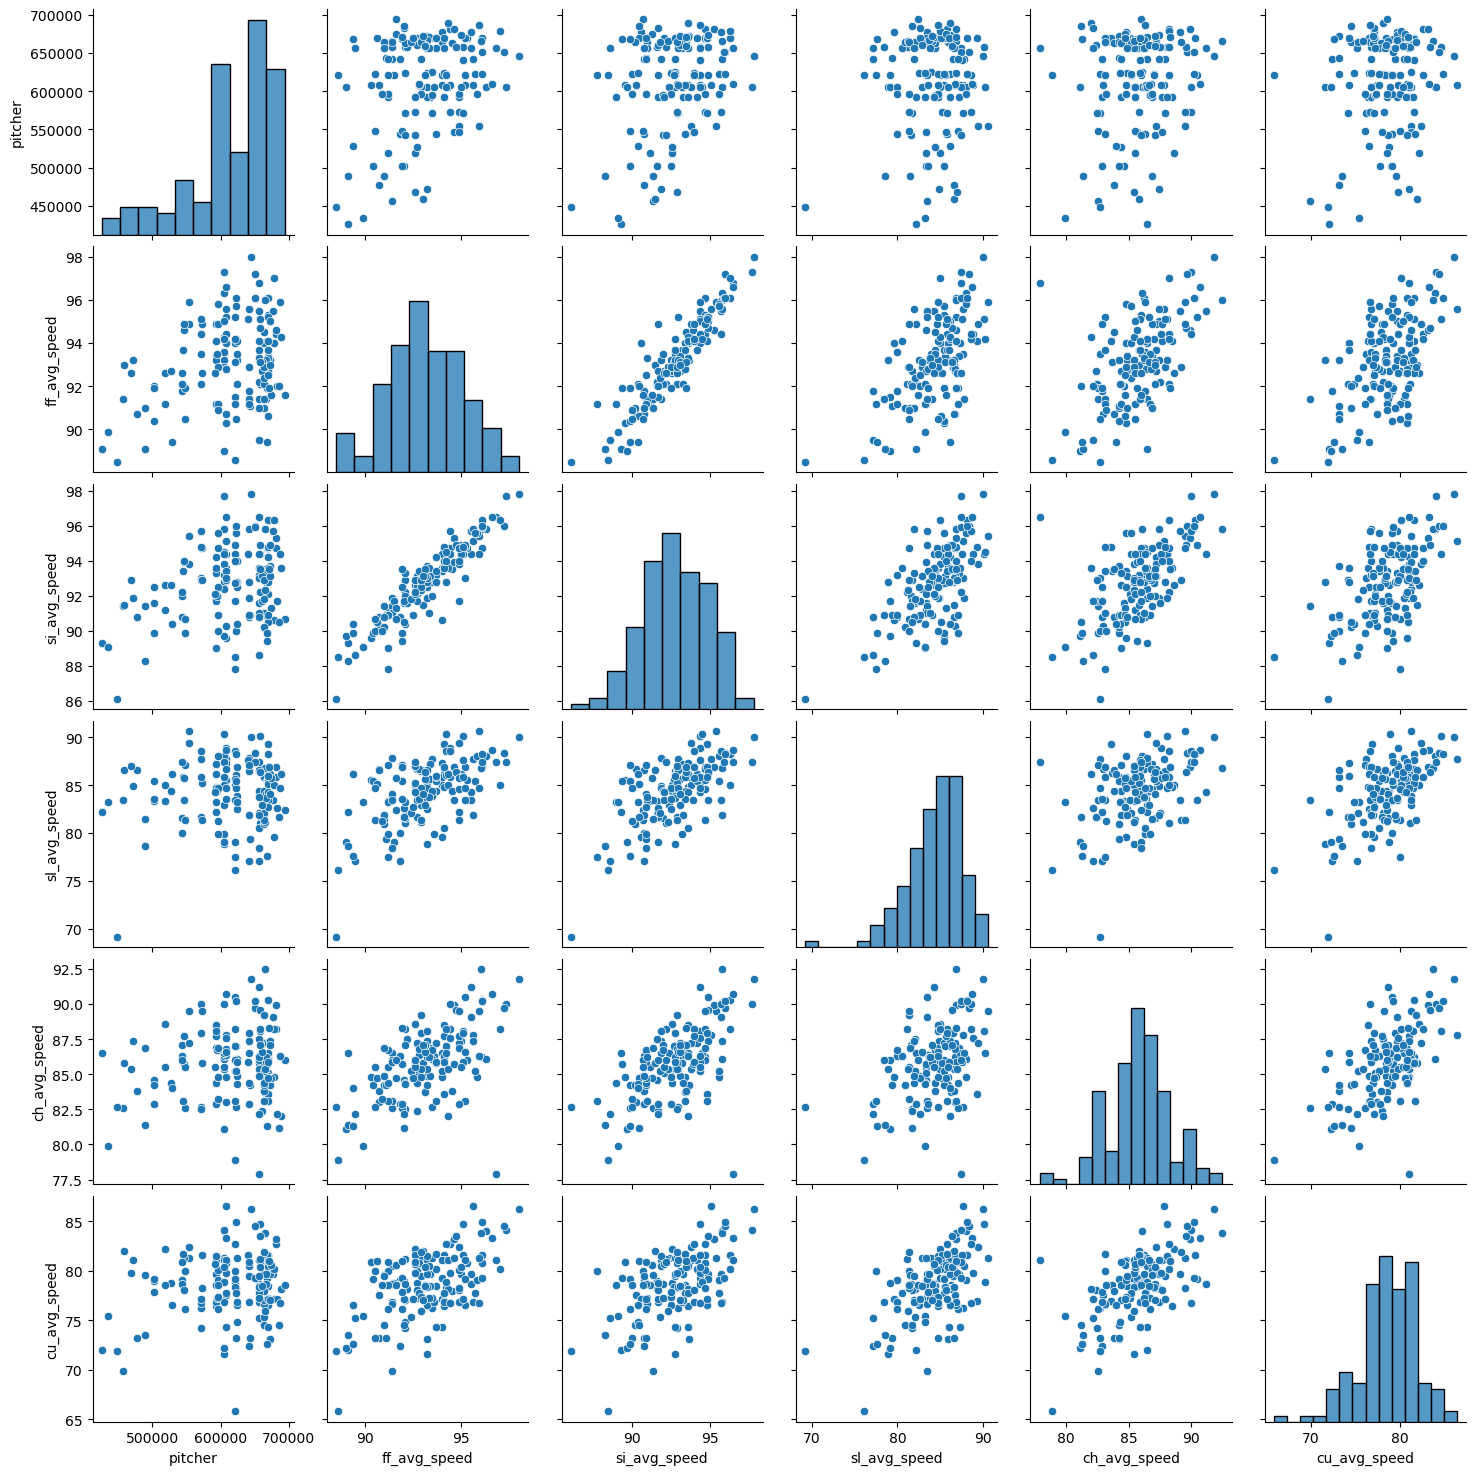

In [178]:
import seaborn as sns 
sns.pairplot(pitch_df)

Text(0, 0.5, 'si_avg_speed')

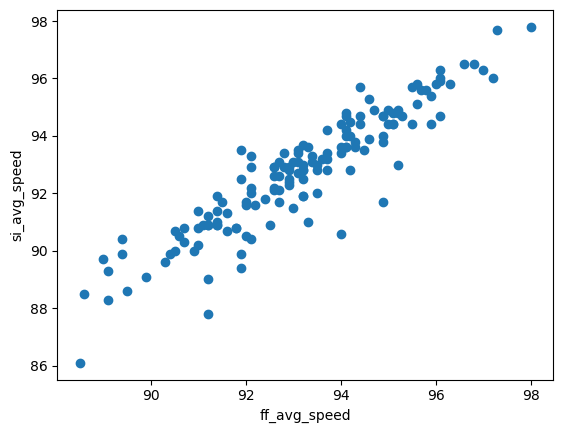

In [181]:
plt.scatter(pitch_df['ff_avg_speed'],pitch_df['si_avg_speed'])
plt.xlabel('ff_avg_speed')
plt.ylabel('si_avg_speed')           
           

<AxesSubplot:xlabel='ff_avg_speed', ylabel='si_avg_speed'>

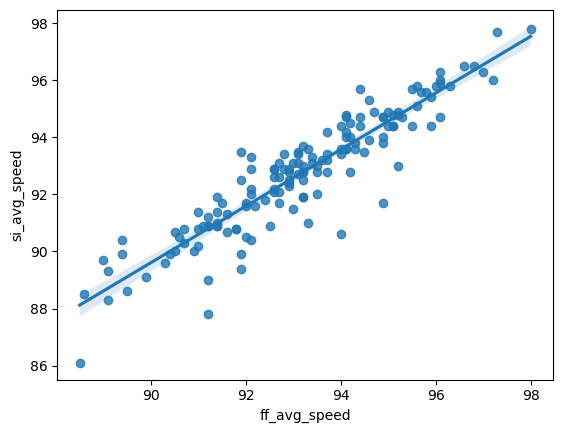

In [182]:
sns.regplot(x='ff_avg_speed',y='si_avg_speed',data=pitch_df)